# Breno Rodrigues Azevedo RM556764

# Lorenzo Jacob RM99559

# Rodolfo Ricco RM551265

In [10]:
import zipfile
import os
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

In [2]:
zip_path = "/home/archive.zip"
extract_path = "/content/geradores_eolicos_dataset"


In [11]:
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Dataset extraído para: {extract_path}")

Dataset extraído para: /content/geradores_eolicos_dataset


In [12]:
classes = ['geradores_eolicos', 'outros']
for cls in classes:
    cls_path = os.path.join(extract_path, 'archive', cls)
    images = os.listdir(cls_path)


    train, temp = train_test_split(images, test_size=0.2, random_state=42)
    val, test = train_test_split(temp, test_size=0.5, random_state=42)


    for split in ['train', 'val', 'test']:
        split_path = os.path.join(base_dir, split, cls)
        os.makedirs(split_path, exist_ok=True)


    for img in train:
        shutil.copy(os.path.join(cls_path, img), os.path.join(base_dir, 'train', cls))

    for img in val:
        shutil.copy(os.path.join(cls_path, img), os.path.join(base_dir, 'val', cls))

    for img in test:
        shutil.copy(os.path.join(cls_path, img), os.path.join(base_dir, 'test', cls))

print(f"Dataset organizado em: {base_dir}")

Dataset organizado em: /content/organized_geradores_eolicos


In [13]:
datagen = ImageDataGenerator(rescale=1.0/255)

train_gen = datagen.flow_from_directory(
    os.path.join(base_dir, 'train'),
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

Found 17 images belonging to 2 classes.


In [6]:
val_gen = datagen.flow_from_directory(
    os.path.join(base_dir, 'val'),
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'  # Produz rótulos no formato binário (0 ou 1)
)

Dataset organizado em: /content/organized_geradores_eolicos


In [14]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Saída binária (probabilidade entre 0 e 1)
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
history = model.fit(
    train_gen,
    epochs=10,
    validation_data=val_gen
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.5882 - loss: 0.6847 - val_accuracy: 0.0000e+00 - val_loss: 11.6867
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.5882 - loss: 5.7564 - val_accuracy: 1.0000 - val_loss: 0.2346
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.5882 - loss: 0.6300 - val_accuracy: 1.0000 - val_loss: 0.3601
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.8235 - loss: 0.4377 - val_accuracy: 0.0000e+00 - val_loss: 1.8891
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.7059 - loss: 0.5007 - val_accuracy: 0.0000e+00 - val_loss: 1.5576
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.8235 - loss: 0.3491 - val_accuracy: 1.0000 - val_loss: 0.6618
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 1.0000 - loss: 0.1903 - val_accuracy: 1.0000 - val_loss: 0.2589
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.9412 - loss: 0.2885 - val_accuracy: 1.0000 - val_loss: 0.2976
Epoch 9/10
1/1

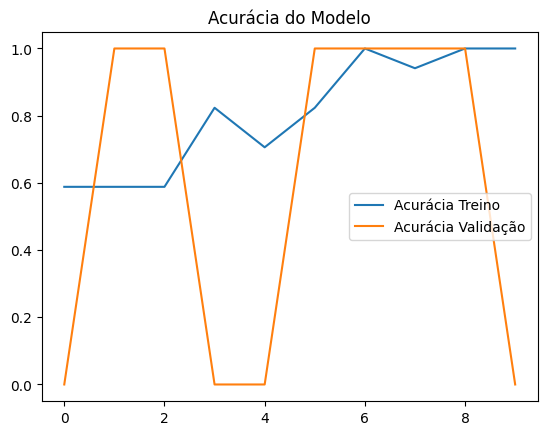

In [16]:
plt.plot(history.history['accuracy'], label='Acurácia Treino')
plt.plot(history.history['val_accuracy'], label='Acurácia Validação')
plt.legend()
plt.title("Acurácia do Modelo")
plt.show()

In [17]:
model_save_path = "/content/geradores_eolicos_model.h5"
model.save(model_save_path)
print(f"Modelo salvo em: {model_save_path}")

Modelo salvo em: /content/geradores_eolicos_model.h5


In [22]:
test_dir = "/content/organized_geradores_eolicos/test/geradores_eolicos"
test_images = os.listdir(test_dir)

if test_images:

    test_img_path = os.path.join(test_dir, test_images[0])
    print(f"Usando a imagem de teste: {test_img_path}")

    img = image.load_img(test_img_path, target_size=(128, 128))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

Usando a imagem de teste: /content/organized_geradores_eolicos/test/geradores_eolicos/horizontal-axis-wind-turbine (1).webp


In [24]:
test_dir = "/content/organized_geradores_eolicos/test/geradores_eolicos"
test_images = os.listdir(test_dir)

if test_images:

    test_img_path = os.path.join(test_dir, test_images[0])
    print(f"Usando a imagem de teste: {test_img_path}")


    img = image.load_img(test_img_path, target_size=(128, 128))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)


    predictions = model.predict(img_array)
    predicted_class = "geradores_eolicos" if predictions[0][0] > 0.5 else "outros"
    print(f"Classe prevista: {predicted_class}")
else:
    print("Nenhuma imagem encontrada no diretório de teste.")

Usando a imagem de teste: /content/organized_geradores_eolicos/test/geradores_eolicos/horizontal-axis-wind-turbine (1).webp
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Classe prevista: outros
